# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Data Preprocessing

In [27]:
data = pd.read_csv("/home/chris/Dokumente/Digethic/Aufgaben/gym_members_exercise_tracking.csv", header=0)

data_num = data.select_dtypes(exclude="object")
data_cat = data.select_dtypes(include="object")

encoder = OneHotEncoder(sparse_output=False)
data_enc = encoder.fit_transform(data_cat)
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(data_cat.columns) for cat in encoder.categories_[i]]
data_cat_encoded = pd.DataFrame(encoder.fit_transform(data_cat), columns=categorical_columns)

scaler = StandardScaler()
data_num = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)

data3 = pd.concat([data_num, data_cat_encoded.set_axis(data_num.index)], axis=1)
data2 = data_num
data2.head()
# data.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,1.422343,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,1.495690,-1.978321,1.455967,0.743295,1.609784,0.794278
1,0.600965,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,-0.082284,1.426301,-0.877898,0.743295,0.257176,1.064652
2,-0.548964,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,1.346380,-0.544488,0.743295,0.257176,-0.030361
3,-1.123928,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,-1.370351,0.611110,-0.877898,-0.352502,-1.095432,-0.976669
4,-0.056137,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,-1.282278,0.675047,0.289035,-0.352502,-1.095432,-1.580503


# Perform t-SNE and PCA and plot

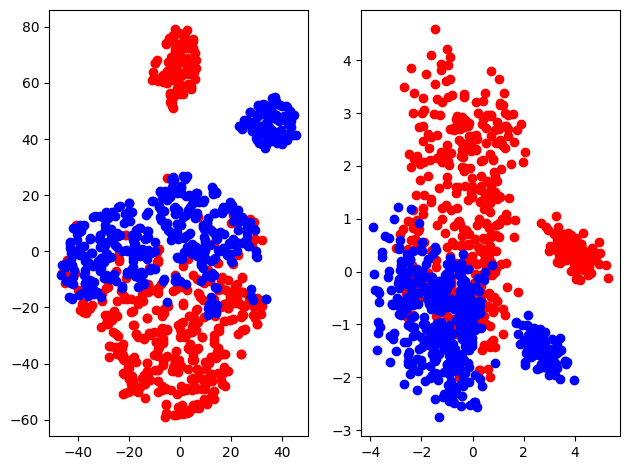

In [26]:
data_t_SNE = TSNE(n_components=2, learning_rate="auto", init="random", perplexity=15).fit_transform(data2)
# print(data_t_SNE.shape)
data_PCA = PCA(n_components=2).fit_transform(data2)
# print(data_PCA.shape)

fig, axis = plt.subplots(nrows=1, ncols=2)
axis[0].scatter(data_t_SNE[data3["Gender_Male"] == 1.0,0], data_t_SNE[data3["Gender_Male"] == 1.0,1], color='red')
axis[0].scatter(data_t_SNE[data3["Gender_Male"] == 0.0,0], data_t_SNE[data3["Gender_Male"] == 0.0,1], color='blue')
# fig[0].title("t-SNE")
axis[1].scatter(data_PCA[data3["Gender_Male"] == 1.0,0], data_PCA[data3["Gender_Male"] == 1.0,1], color='red')
axis[1].scatter(data_PCA[data3["Gender_Male"] == 0.0,0], data_PCA[data3["Gender_Male"] == 0.0,1], color='blue')
fig.tight_layout()
plt.show()
